In [1]:
import pandas as pd


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
data =pd.read_csv('pre-processed.csv')
                  

In [6]:
data.info

<bound method DataFrame.info of                       Date       Screen Name           Full Name  \
0        11/7/2016 7:42:55         @mzousmer         Max Zousmer   
1        11/7/2016 8:13:37       @cak_ed2004     Edy Febriansyah   
2        11/7/2016 9:32:51     @nafeesatanty                apis   
3        11/7/2016 9:55:15     @nafeesatanty                apis   
4       11/7/2016 10:34:22    @kissanystava2       Anna Valtonen   
...                    ...               ...                 ...   
868347  3/24/2021 15:06:29       @lou26chris        louisa hardy   
868348  3/24/2021 15:47:16      @MarieJoseM1           Mariejose   
868349  3/24/2021 15:52:14      @c10mannella      Chris Mannella   
868350  3/24/2021 15:59:14  @PeterButterfi12   Peter Butterfield   
868351  3/24/2021 16:23:34     @isamorandeau  Isabelle Morandeau   

                                               Tweet Text      Tweet ID  \
0           @SanDiegoAirport no tsa pre check for United?  7.954489e+17   
1

In [8]:
data.shape

(868352, 18)

# changing column names

In [10]:
data.head(1)

,Date,Screen Name,Full Name,Tweet Text,Tweet ID,App,Followers,Follows,Retweets,Favorites,Verfied,User Since,Location,Bio,Profile Image,Airport Twitter Tag,Airport IATA Codes,Airport Names
0,11/7/2016 7:42:55,@mzousmer,Max Zousmer,@SanDiegoAirport no tsa pre check for United?,7.954489e+17,Twitter for Android,23.0,116.0,0.0,0.0,No,3/13/2013,NaN,NaN,View,@sandiegoairport,SAN,San Diego Airport


In [12]:
data.columns

Index(['Date', 'Screen Name', 'Full Name', 'Tweet Text', 'Tweet ID', 'App',
       'Followers', 'Follows', 'Retweets', 'Favorites', 'Verfied',
       'User Since', 'Location', 'Bio', 'Profile Image', 'Airport Twitter Tag',
       'Airport IATA Codes', 'Airport Names'],
      dtype='object')

In [14]:
#changing column names
data.columns = ['Date','Screen_Name', 'Full_Name', 'Tweet', 'Tweet_ID','App','Followers','Follows','Retweets','Favorites','Verfied','User_since','Location','Bio','Profile_Image','Twitter_Tag','IATA_Codes','Airport_Name']

In [15]:
data.columns

Index(['Date', 'Screen_Name', 'Full_Name', 'Tweet', 'Tweet_ID', 'App',
       'Followers', 'Follows', 'Retweets', 'Favorites', 'Verfied',
       'User_since', 'Location', 'Bio', 'Profile_Image', 'Twitter_Tag',
       'IATA_Codes', 'Airport_Name'],
      dtype='object')

In [29]:
#selecting relevant location of airports
df=data[data['Location'].astype(str).str.contains('London | Manchester', case= True, regex = True)]

In [32]:
df.shape

(5003, 18)

In [31]:
df.Location.value_counts(normalize=True).head(10)

London                     0.114931
London UK                  0.063962
London - Dublin            0.020987
Greater Manchester         0.013992
London - Dublin            0.013192
London Town                0.011993
London Stansted Airport    0.009794
London & Valencia          0.009394
Didsbury, Manchester       0.008795
London Baby                0.008195
Name: Location, dtype: float64

In [33]:
df1 = df.assign(Location = df.Location.str.replace('London UK', 'London'))

In [61]:
df1.shape

(5003, 18)

In [36]:
df2 = df1.assign(Location = df1.Location.str.replace('London - Dublin', 'London'))

In [41]:
df3 = df2.assign(Location = df2.Location.str.replace('London Town','London'))

In [42]:
df4 = df3.assign(Location = df3.Location.str.replace('London Stansted Airport', 'London'))

In [44]:
df5 = df4.assign(Location = df4.Location.str.replace('London England', 'London'))

In [46]:
df5.Location.value_counts(normalize=True).head(10)

London                      0.139117
London                      0.106136
Greater Manchester          0.013992
London & Valencia           0.009394
Didsbury, Manchester        0.008795
London Baby                 0.008195
Greater Manchester          0.006596
south Greater Manchester    0.006596
London (Via Blackpool)      0.006396
London & Miami              0.005797
Name: Location, dtype: float64

In [51]:
df6 = df5.assign(Location = df5.Location.str.replace('Greater Manchester', 'ManChester'))

In [60]:
df6.shape

(5003, 18)

In [52]:
df7 = df6.assign(Location = df6.Location.str.replace('Greater Manchester', 'ManChester'))

In [53]:
df8 = df7.assign(Location = df7.Location.str.replace('south Greater Manchester', 'ManChester'))

In [54]:
df8.Location.value_counts(normalize=True).head(10)

London                    0.139117
London                    0.106136
ManChester                0.013992
London & Valencia         0.009394
Didsbury, Manchester      0.008795
London Baby               0.008195
south ManChester          0.006596
ManChester                0.006596
London (Via Blackpool)    0.006396
London & Miami            0.005797
Name: Location, dtype: float64

In [55]:
df9 = df8.assign(Location = df8.Location.str.replace('ManChester', 'ManChester'))

In [56]:
df10 = df9.assign(Location = df9.Location.str.replace('London', 'London'))

In [57]:
df10.Location.value_counts(normalize=True).head(10)

London                    0.139117
London                    0.106136
ManChester                0.013992
London & Valencia         0.009394
Didsbury, Manchester      0.008795
London Baby               0.008195
south ManChester          0.006596
ManChester                0.006596
London (Via Blackpool)    0.006396
London & Miami            0.005797
Name: Location, dtype: float64

In [190]:
df11 = df10.assign(Location = df10.Location.str.replace('south ManChester', 'ManChester'))

In [191]:
df11.shape

(5003, 18)

In [192]:
newdf = df11

In [193]:
newdf.head(1)

,Date,Screen_Name,Full_Name,Tweet,Tweet_ID,App,Followers,Follows,Retweets,Favorites,Verfied,User_since,Location,Bio,Profile_Image,Twitter_Tag,IATA_Codes,Airport_Name
64,11/8/2016 10:35:18,@trinetti,Matthew Trinetti,@SanDiegoAirport nearly gave myself a heart at...,7.958547e+17,Twitter for iPhone,2764.0,1843.0,0.0,0.0,No,2/16/2009,USA + London + World,"Writer, traveler, deliberate journeyer. Buildi...",View,@sandiegoairport,SAN,San Diego Airport


In [65]:
newdf.to_csv('cleanedData')

In [194]:
#dropping some columns
newdf.drop(['Full_Name','Tweet_ID', 'App', 'Verfied', 'User_since', 'Bio', 'Profile_Image'], axis =1, inplace = True)

In [195]:
#after the columns are dropped
newdf.head(1)

,Date,Screen_Name,Tweet,Followers,Follows,Retweets,Favorites,Location,Twitter_Tag,IATA_Codes,Airport_Name
64,11/8/2016 10:35:18,@trinetti,@SanDiegoAirport nearly gave myself a heart at...,2764.0,1843.0,0.0,0.0,USA + London + World,@sandiegoairport,SAN,San Diego Airport


In [79]:
from bs4 import BeautifulSoup

In [196]:
import nltk
def remove_punct(text):
    import string as st
    text  = "".join([char for char in text if char not in st.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

newdf['Tweet'] = newdf['Tweet'].apply(lambda x: remove_punct(x))
newdf.head(10)


,Date,Screen_Name,Tweet,Followers,Follows,Retweets,Favorites,Location,Twitter_Tag,IATA_Codes,Airport_Name
64,11/8/2016 10:35:18,@trinetti,SanDiegoAirport nearly gave myself a heart att...,2764.0,1843.0,0.0,0.0,USA + London + World,@sandiegoairport,SAN,San Diego Airport
1226,11/25/2016 1:34:32,@KeaneJohn69,iflymia thx was a great arrival experience A p...,1231.0,2420.0,0.0,0.0,London,@iflymia,MIA,Miami International Airport
1946,12/7/2016 18:46:34,@roundrockgolf,FlyTPA emirates Can you fly Dubai TPA now,6.0,106.0,0.0,1.0,New York City & (London 2015),@flytpa,TPA,Tampa International Airport
1975,12/7/2016 22:09:25,@roundrockgolf,FlyTPA emirates Is it still at gate F,6.0,106.0,0.0,0.0,New York City & (London 2015),@flytpa,TPA,Tampa International Airport
3870,1/3/2017 18:16:13,@jygrabowski,iflymia Are Interl arrivals still delayed at C...,149.0,263.0,0.0,0.0,London - Philadelphia,@iflymia,MIA,Miami International Airport
4429,1/10/2017 5:17:30,@Kryssieroyal,BWIAirport my daughters been in arrivals two h...,90.0,603.0,0.0,0.0,London,@bwi_airport,BWI,BWI Marshall Airport
4435,1/10/2017 6:13:28,@Kryssieroyal,BWIAirport its all sorted now secondary But sh...,90.0,603.0,0.0,0.0,London,@bwi_airport,BWI,BWI Marshall Airport
5653,1/30/2017 1:58:46,@_tfprice,PHXSkyHarbor reporting for cronkitenews httpst...,331.0,983.0,0.0,0.0,Siena | Phoenix | London,@phxskyharbor,PHX,Phoneix Sky Harbor International Airport
6482,2/12/2017 1:24:06,@KayleighKiss,BelfastAirport has the slowest and unorganised...,387.0,890.0,0.0,0.0,Glasgow via London & Belfast,@belfastairport,BFS,Belfast International Airport
6483,2/12/2017 1:59:55,@KayleighKiss,BelfastAirport AWJ dont even start me Its chao...,387.0,890.0,0.0,0.0,Glasgow via London & Belfast,@belfastairport,BFS,Belfast International Airport


In [197]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

newdf['Tweet'] = newdf['Tweet'].apply(lambda x: tokenization(x.lower()))

In [198]:
newdf['Tweet']

64        [sandiegoairport, nearly, gave, myself, a, hea...
1226      [iflymia, thx, was, a, great, arrival, experie...
1946      [flytpa, emirates, can, you, fly, dubai, tpa, ...
1975       [flytpa, emirates, is, it, still, at, gate, f, ]
3870      [iflymia, are, interl, arrivals, still, delaye...
                                ...                        
867767    [rt, stanstedchamber, stnairport, happy, th, b...
867815    [rt, gatwickairport, stnairport, crack, open, ...
867816    [rt, mucairport, stnairport, happy, birthday, ...
868268                             [stnairport, at, last, ]
868273    [schiphol, i, m, a, british, national, who, tr...
Name: Tweet, Length: 5003, dtype: object

In [180]:
from nltk.corpus import stopwords
stopword = nltk.corpus.stopwords.words('english')

In [199]:
def remove_stopword(text):
    text = [word for word in text if word not in stopword]
    return text

newdf['Tweet'] = newdf['Tweet'].apply(lambda x: remove_stopword(x))

newdf.head(1)

,Date,Screen_Name,Tweet,Followers,Follows,Retweets,Favorites,Location,Twitter_Tag,IATA_Codes,Airport_Name
64,11/8/2016 10:35:18,@trinetti,"[sandiegoairport, nearly, gave, heart, attack,...",2764.0,1843.0,0.0,0.0,USA + London + World,@sandiegoairport,SAN,San Diego Airport


In [200]:
newdf['Tweet'].head(1)

64    [sandiegoairport, nearly, gave, heart, attack,...
Name: Tweet, dtype: object

In [114]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [137]:
pip install vaderSentiment

In [138]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [203]:
newdf['scores'] = newdf['Tweet'].apply(lambda Tweet: analyser.polarity_scores(str(Tweet)))

In [204]:
newdf

,Date,Screen_Name,Tweet,Followers,Follows,Retweets,Favorites,Location,Twitter_Tag,IATA_Codes,Airport_Name,scores
64,11/8/2016 10:35:18,@trinetti,"[sandiegoairport, nearly, gave, heart, attack,...",2764.0,1843.0,0.0,0.0,USA + London + World,@sandiegoairport,SAN,San Diego Airport,"{'neg': 0.15, 'neu': 0.583, 'pos': 0.267, 'com..."
1226,11/25/2016 1:34:32,@KeaneJohn69,"[iflymia, thx, great, arrival, experience, pes...",1231.0,2420.0,0.0,0.0,London,@iflymia,MIA,Miami International Airport,"{'neg': 0.202, 'neu': 0.481, 'pos': 0.317, 'co..."
1946,12/7/2016 18:46:34,@roundrockgolf,"[flytpa, emirates, fly, dubai, tpa]",6.0,106.0,0.0,1.0,New York City & (London 2015),@flytpa,TPA,Tampa International Airport,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1975,12/7/2016 22:09:25,@roundrockgolf,"[flytpa, emirates, still, gate, f, ]",6.0,106.0,0.0,0.0,New York City & (London 2015),@flytpa,TPA,Tampa International Airport,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3870,1/3/2017 18:16:13,@jygrabowski,"[iflymia, interl, arrivals, still, delayed, cu...",149.0,263.0,0.0,0.0,London - Philadelphia,@iflymia,MIA,Miami International Airport,"{'neg': 0.14, 'neu': 0.662, 'pos': 0.199, 'com..."
...,...,...,...,...,...,...,...,...,...,...,...,...
867767,3/15/2021 16:16:01,@checkinstansted,"[rt, stanstedchamber, stnairport, happy, th, b...",1813.0,2901.0,1.0,0.0,London,"@stn_airport, @stn_airport","STN, STN","London Stansted Airpor, London Stansted Airpor","{'neg': 0.0, 'neu': 0.748, 'pos': 0.252, 'comp..."
867815,3/15/2021 23:00:45,@atmosphereairuk,"[rt, gatwickairport, stnairport, crack, open, ...",2796.0,5001.0,4.0,0.0,London,@stn_airport,STN,London Stansted Airpor,"{'neg': 0.0, 'neu': 0.585, 'pos': 0.415, 'comp..."
867816,3/15/2021 23:00:48,@atmosphereairuk,"[rt, mucairport, stnairport, happy, birthday, ...",2796.0,5001.0,2.0,0.0,London,"@stn_airport, @stn_airport","STN, STN","London Stansted Airpor, London Stansted Airpor","{'neg': 0.0, 'neu': 0.383, 'pos': 0.617, 'comp..."
868268,3/22/2021 21:54:11,@Antoine71284847,"[stnairport, last, ]",1270.0,896.0,0.0,0.0,"Paris, London , Australasia .",@stn_airport,STN,London Stansted Airpor,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [205]:
newdf['compound'] = newdf['scores'].apply(lambda score_dict: score_dict['compound'])
newdf['sentiment_type']=''
newdf.loc[newdf.compound>0,'sentiment_type']='POSITIVE'
newdf.loc[newdf.compound==0,'sentiment_type']='NEUTRAL'
newdf.loc[newdf.compound<0,'sentiment_type']='NEGATIVE'


In [207]:
newdf.head(50)

,Date,Screen_Name,Tweet,Followers,Follows,Retweets,Favorites,Location,Twitter_Tag,IATA_Codes,Airport_Name,scores,compound,sentiment_type
64,11/8/2016 10:35:18,@trinetti,"[sandiegoairport, nearly, gave, heart, attack,...",2764.0,1843.0,0.0,0.0,USA + London + World,@sandiegoairport,SAN,San Diego Airport,"{'neg': 0.15, 'neu': 0.583, 'pos': 0.267, 'com...",0.3400,POSITIVE
1226,11/25/2016 1:34:32,@KeaneJohn69,"[iflymia, thx, great, arrival, experience, pes...",1231.0,2420.0,0.0,0.0,London,@iflymia,MIA,Miami International Airport,"{'neg': 0.202, 'neu': 0.481, 'pos': 0.317, 'co...",0.5267,POSITIVE
1946,12/7/2016 18:46:34,@roundrockgolf,"[flytpa, emirates, fly, dubai, tpa]",6.0,106.0,0.0,1.0,New York City & (London 2015),@flytpa,TPA,Tampa International Airport,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
1975,12/7/2016 22:09:25,@roundrockgolf,"[flytpa, emirates, still, gate, f, ]",6.0,106.0,0.0,0.0,New York City & (London 2015),@flytpa,TPA,Tampa International Airport,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
3870,1/3/2017 18:16:13,@jygrabowski,"[iflymia, interl, arrivals, still, delayed, cu...",149.0,263.0,0.0,0.0,London - Philadelphia,@iflymia,MIA,Miami International Airport,"{'neg': 0.14, 'neu': 0.662, 'pos': 0.199, 'com...",0.2023,POSITIVE
4429,1/10/2017 5:17:30,@Kryssieroyal,"[bwiairport, daughters, arrivals, two, hours, ...",90.0,603.0,0.0,0.0,London,@bwi_airport,BWI,BWI Marshall Airport,"{'neg': 0.278, 'neu': 0.722, 'pos': 0.0, 'comp...",-0.4019,NEGATIVE
4435,1/10/2017 6:13:28,@Kryssieroyal,"[bwiairport, sorted, secondary, high, praise, ...",90.0,603.0,0.0,0.0,London,@bwi_airport,BWI,BWI Marshall Airport,"{'neg': 0.0, 'neu': 0.488, 'pos': 0.512, 'comp...",0.8126,POSITIVE
5653,1/30/2017 1:58:46,@_tfprice,"[phxskyharbor, reporting, cronkitenews, httpst...",331.0,983.0,0.0,0.0,Siena | Phoenix | London,@phxskyharbor,PHX,Phoneix Sky Harbor International Airport,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
6482,2/12/2017 1:24:06,@KayleighKiss,"[belfastairport, slowest, unorganised, securit...",387.0,890.0,0.0,0.0,Glasgow via London & Belfast,@belfastairport,BFS,Belfast International Airport,"{'neg': 0.0, 'neu': 0.789, 'pos': 0.211, 'comp...",0.3400,POSITIVE
6483,2/12/2017 1:59:55,@KayleighKiss,"[belfastairport, awj, dont, even, start, chaos...",387.0,890.0,0.0,0.0,Glasgow via London & Belfast,@belfastairport,BFS,Belfast International Airport,"{'neg': 0.0, 'neu': 0.659, 'pos': 0.341, 'comp...",0.6906,POSITIVE


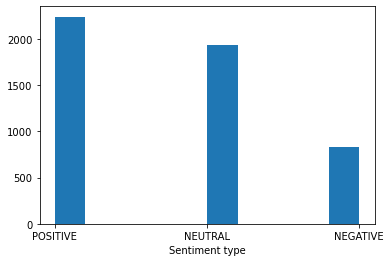

In [208]:
plt.hist(newdf['sentiment_type'])
plt.xlabel('Sentiment type')
plt.show()

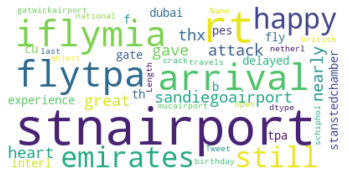

In [217]:
text = str(newdf['Tweet'])
wordcloud = WordCloud(background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [218]:
from datetime import datetime

In [219]:
newdf.head(1)

,Date,Screen_Name,Tweet,Followers,Follows,Retweets,Favorites,Location,Twitter_Tag,IATA_Codes,Airport_Name,scores,compound,sentiment_type
64,11/8/2016 10:35:18,@trinetti,"[sandiegoairport, nearly, gave, heart, attack,...",2764.0,1843.0,0.0,0.0,USA + London + World,@sandiegoairport,SAN,San Diego Airport,"{'neg': 0.15, 'neu': 0.583, 'pos': 0.267, 'com...",0.34,POSITIVE


In [222]:
newdf['Date'] = newdf['Date'].dt.strftime("%d/%m/%y")

In [224]:
newdf.head(1)

,Date,Screen_Name,Tweet,Followers,Follows,Retweets,Favorites,Location,Twitter_Tag,IATA_Codes,Airport_Name,scores,compound,sentiment_type
64,08/11/16,@trinetti,"[sandiegoairport, nearly, gave, heart, attack,...",2764.0,1843.0,0.0,0.0,USA + London + World,@sandiegoairport,SAN,San Diego Airport,"{'neg': 0.15, 'neu': 0.583, 'pos': 0.267, 'com...",0.34,POSITIVE


In [232]:
grouped = newdf.groupby(by='Date')['sentiment_type'].value_counts()

In [233]:
grouped

Date      sentiment_type
01/01/17  POSITIVE          1
01/01/18  POSITIVE          3
          NEGATIVE          2
01/01/19  POSITIVE          4
          NEGATIVE          1
                           ..
31/12/17  NEGATIVE          2
          POSITIVE          2
31/12/18  POSITIVE          5
          NEGATIVE          2
          NEUTRAL           2
Name: sentiment_type, Length: 1953, dtype: int64

In [234]:
unstacked = grouped.unstack(level=1)

In [250]:
newdf['Date'] = pd.to_datetime(newdf['Date'],format='%d/%m/%y')
newdf['year'] = pd.DatetimeIndex(df['Date']).year

In [251]:
newdf.head(1)

,Date,Screen_Name,Tweet,Followers,Follows,Retweets,Favorites,Location,Twitter_Tag,IATA_Codes,Airport_Name,scores,compound,sentiment_type,date,year
64,2016-11-08,@trinetti,"[sandiegoairport, nearly, gave, heart, attack,...",2764.0,1843.0,0.0,0.0,USA + London + World,@sandiegoairport,SAN,San Diego Airport,"{'neg': 0.15, 'neu': 0.583, 'pos': 0.267, 'com...",0.34,POSITIVE,2016-11-08,2016


In [257]:
newdf.drop(['date'], axis=1, inplace= True)

In [258]:
grouped = newdf.groupby(by='year')['sentiment_type'].value_counts()

In [253]:
grouped

year  sentiment_type
2016  POSITIVE          159
      NEUTRAL           124
      NEGATIVE           80
2017  POSITIVE          672
      NEUTRAL           559
      NEGATIVE          247
2018  POSITIVE          896
      NEUTRAL           736
      NEGATIVE          314
2019  POSITIVE          210
      NEUTRAL           200
      NEGATIVE           94
2020  NEUTRAL           260
      POSITIVE          249
      NEGATIVE           67
2021  NEUTRAL            57
      POSITIVE           55
      NEGATIVE           24
Name: sentiment_type, dtype: int64

In [254]:
unstacked = grouped.unstack(level=1)

In [280]:
unstacked

sentiment_type,NEGATIVE,NEUTRAL,POSITIVE
year,,,
2016,80,124,159
2017,247,559,672
2018,314,736,896
2019,94,200,210
2020,67,260,249
2021,24,57,55


Text(0.5, 1.0, 'Sentiment by years')

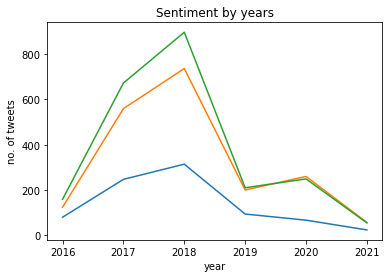

In [289]:
plt.plot(unstacked)
plt.xlabel('year')
plt.ylabel('no. of tweets')
plt.title("Sentiment by years")